## INTRO REGRESION LINEAL

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("../ficheros/diamons_enconding.csv", index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


El objetivo es realizar nuestro primer modelo de machine learning, probamos primero con los datos sin estandarizar y con el encoding

In [11]:
#Comenzamos separando la "X" y la "y"
X = df.drop("price", axis = 1)
y= df["price"]

In [12]:
X.head(2) # Comprobamos

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31


In [13]:
y.head(2)

0    326
1    326
Name: price, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Siguiente paso creamos el train y es test

In [17]:
#vamos a ajustar nuestro modelo
lr = LinearRegression(n_jobs=-1)

In [18]:
#Vamos a fitear nuestro modelo 
# Lo haremos solamente con los datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
#Ahora haremos las predicciones con el metodo predict
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [20]:
#Y ahora creamos los dataframes, comparando lo real con la predicción
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
31266,880,477.102597,Train
20273,8736,7692.039067,Train
17102,6848,6605.440777,Train
45495,2075,2259.005743,Train
16966,6793,6420.073325,Train


In [21]:
# vamos a por los resultados
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
31266,880,477.102597,Train,402.897403
20273,8736,7692.039067,Train,1043.960933
17102,6848,6605.440777,Train,242.559223
45495,2075,2259.005743,Train,-184.005743
16966,6793,6420.073325,Train,372.926675


In [22]:
resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
Real,50242.0,3159.144222,2763.857194,326.000000,911.000000,2155.000000,4668.000000,11888.000000
Predicted,50242.0,3159.937608,2628.592684,-1749.596412,1036.530661,2544.003626,4937.011812,17739.826390
residuos,50242.0,-0.793386,848.919484,-8253.521298,-480.369742,-107.569871,367.226235,5354.385034


En general por lo que se puede ver los valores de los residuos son bastante altos, llegamos a tener un valor de -8.253 (se sobreestima la variable precio) y de 5.354 (se infraestima la variable precio)

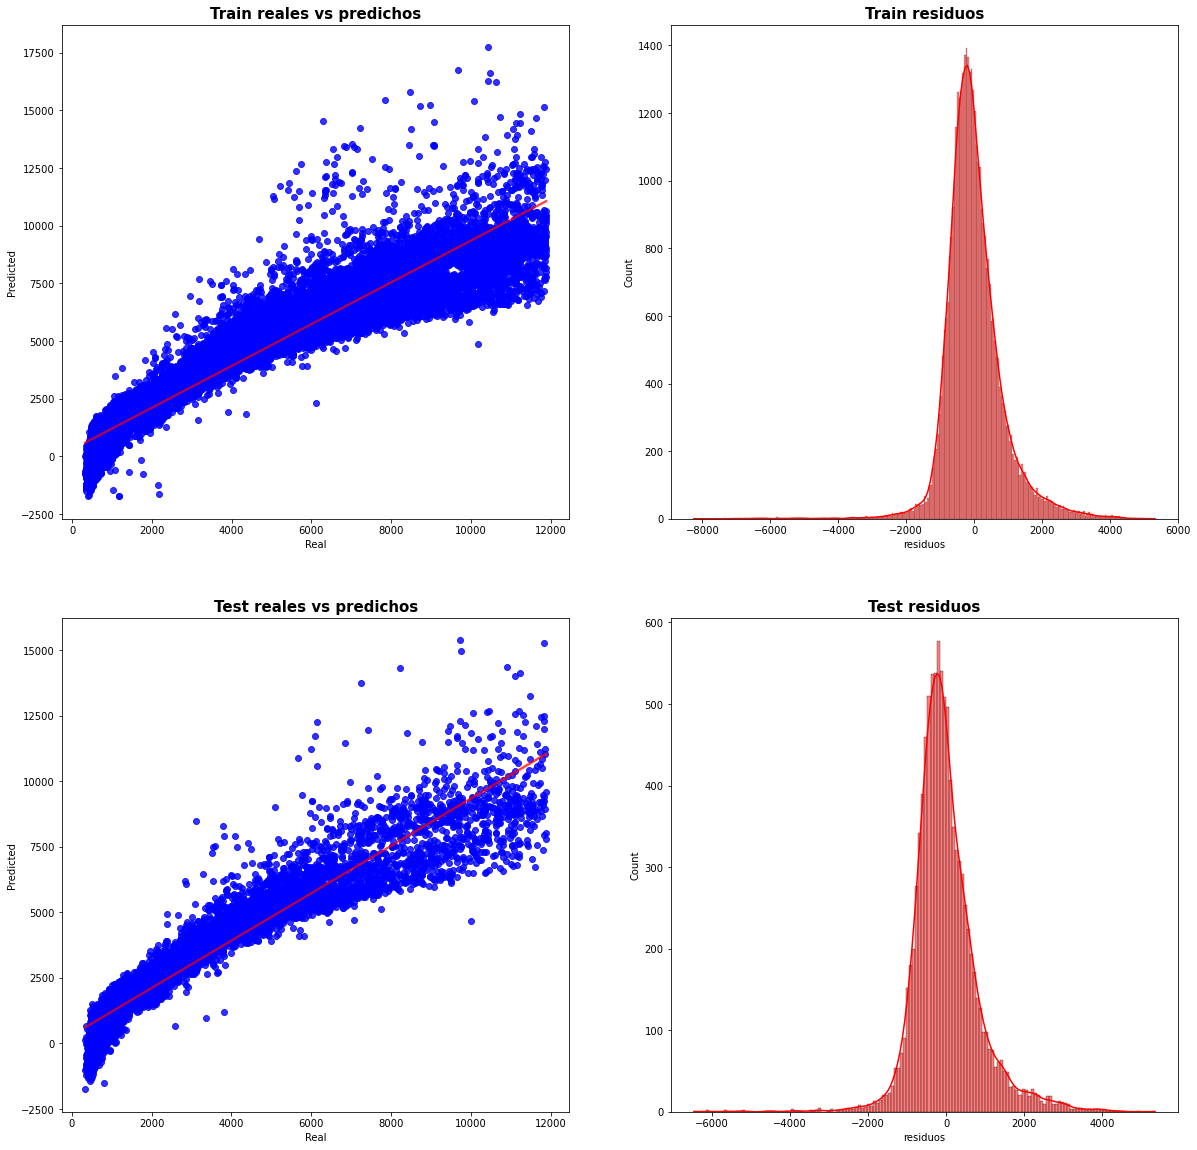

In [24]:
#Realizamos la gráficas para visualizar 
#la diferencia entre lo esperado y lo predicho
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })

sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="red",
             kde=True, 
             ax = ax[0,1])

sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "red",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Parece que para los valores más altos, sobre todo, comete bastantes errores

In [25]:
# Hacemos la validación cruzada, con lo que se dividirá en conjuntos más pequeños para entrenar y usaremos todos los datos al ir iterando
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.023862,0.013026,0.270368,-750.089850
1,0.027702,0.015943,0.613264,-723.653609
2,0.036915,0.007650,0.699451,-792.087817
3,0.028727,0.004902,0.587253,-1348.532508
4,0.026498,0.005725,0.779252,-2144.662481
5,0.026830,0.004187,-29.964276,-567.578382
6,0.035631,0.003423,-15.330936,-621.296654
7,0.020699,0.004890,-5.595313,-630.216456
8,0.018178,0.008098,-0.659040,-541.903649
9,0.027838,0.006421,-0.151269,-618.981590


In [26]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean().round(2))}')

la media para el r2 es -4.88
la media para el RMSE es 873.9


Vamos a realizar lo  mismo pero con los datos estandarizados

In [27]:
df2 = pd.read_csv("../ficheros/diamons_estand_enconding.csv", index_col = 0)
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.746032,4,5,1,-0.214286,-0.666667,326,-0.931818,-0.919540,-0.909091
1,-0.777778,3,5,2,-1.428571,1.333333,326,-0.965909,-1.000000,-1.018182
2,-0.746032,1,5,4,-3.500000,2.666667,327,-0.875000,-0.867816,-1.018182
3,-0.650794,3,1,3,0.428571,0.333333,334,-0.789773,-0.775862,-0.727273
4,-0.619048,1,0,1,1.071429,0.333333,335,-0.710227,-0.706897,-0.618182


In [28]:
#Comenzamos separando la "X" y la "y"
X2 = df2.drop("price", axis = 1)
y2= df2["price"]

In [29]:
X2.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.746032,4,5,1,-0.214286,-0.666667,-0.931818,-0.91954,-0.909091
1,-0.777778,3,5,2,-1.428571,1.333333,-0.965909,-1.00000,-1.018182


In [30]:
y2.head(2)

0    326
1    326
Name: price, dtype: int64

In [31]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
# Siguiente paso creamos el train y es test

In [32]:
#vamos a ajustar nuestro modelo
lr2= LinearRegression(n_jobs=-1)

In [33]:
#Vamos a fitear nuestro modelo 
#solamente con los datos de entrenamiento, para que aprenda el algoritmo
lr2.fit(x2_train, y2_train)

LinearRegression(n_jobs=-1)

In [34]:
#Ahora haremos las predicciones con el metodo predict
y2_predict_train = lr2.predict(x2_train) 
y2_predict_test = lr2.predict(x2_test) 


In [35]:
#Y ahora creamos los dataframes, comparando lo real con la predicción
train_df2 = pd.DataFrame({'Real': y2_train, 'Predicted': y2_predict_train, 'Set': ['Train']*len(y2_train)})
test_df2  = pd.DataFrame({'Real': y2_test,  'Predicted': y2_predict_test,  'Set': ['Test']*len(y2_test)})
resultados2 = pd.concat([train_df2,test_df2], axis = 0)
resultados2.head()

,Real,Predicted,Set
31266,880,477.102597,Train
20273,8736,7692.039067,Train
17102,6848,6605.440777,Train
45495,2075,2259.005743,Train
16966,6793,6420.073325,Train


In [36]:
#vamos a por los resultados
resultados2['residuos'] = resultados2['Real'] - resultados2['Predicted']
resultados2.head()

,Real,Predicted,Set,residuos
31266,880,477.102597,Train,402.897403
20273,8736,7692.039067,Train,1043.960933
17102,6848,6605.440777,Train,242.559223
45495,2075,2259.005743,Train,-184.005743
16966,6793,6420.073325,Train,372.926675


In [37]:
# Cross Validation
cv_scores2 = cross_validate(
                estimator = LinearRegression(),
                X         = X2,
                y         = y2,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores2 = pd.DataFrame(cv_scores2)
cv_scores2


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.021447,0.021185,0.270368,-750.089850
1,0.094207,0.022190,0.613264,-723.653609
2,0.106946,0.004724,0.699451,-792.087817
3,0.031622,0.004311,0.587253,-1348.532508
4,0.037415,0.005055,0.779252,-2144.662481
5,0.037732,0.005708,-29.964276,-567.578382
6,0.064110,0.007478,-15.330936,-621.296654
7,0.072557,0.009237,-5.595313,-630.216456
8,0.048925,0.014003,-0.659040,-541.903649
9,0.038901,0.011598,-0.151269,-618.981590


In [38]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores2["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores2["test_neg_root_mean_squared_error"].mean().round(2))}')

la media para el r2 es -4.88
la media para el RMSE es 873.9


Podemos ver que el modelo ajusta fatal, cosa que ya nos esperábamos porque nuestros datos no eran normales